In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [2]:
df = pd.read_csv("Data/heart.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1=df.isnull().sum()/df.isnull().count()*100
missing_data = pd.concat([total,percent_1],axis=1,keys=['Total','%'])
missing_data.head(5)

,Total,%
age,0,0.0
sex,0,0.0
cp,0,0.0
trestbps,0,0.0
chol,0,0.0


Không có dữ liệu trống <br>
Đổi tên cột

In [5]:
df.columns = ['age','sex','chest_pain_type','resting_blood_pressure','cholesterol','fasting_blood_sugar','rest_ecg','max_heart_rate_achieved','exercise_induced_angina','st_depression','st_slope','num_major_vessels','thalassemia','target']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

<Axes: >

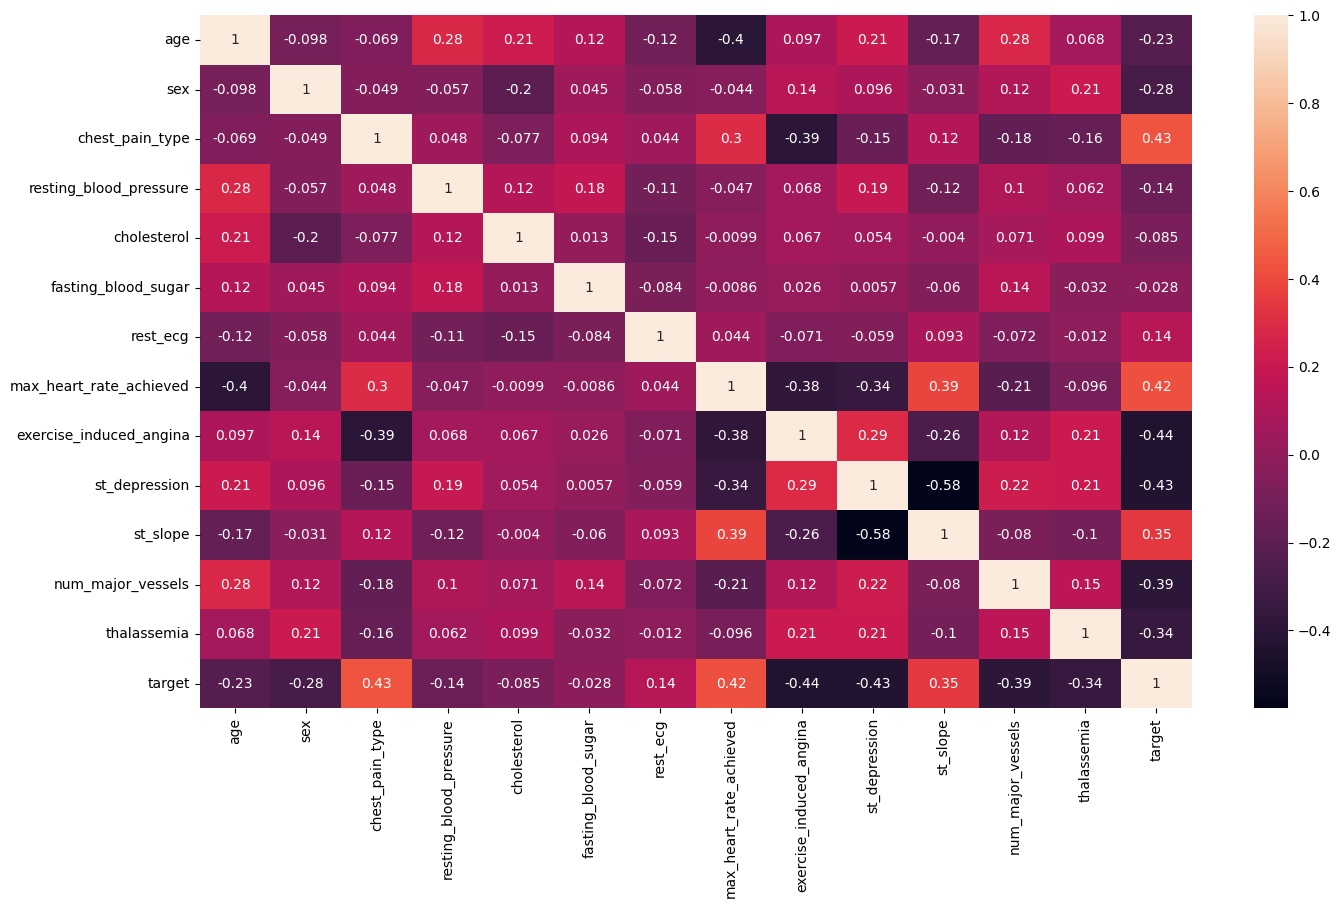

In [9]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(method='pearson'),annot=True)

In [10]:
feature = df.drop('target',axis=1)
label = df['target']

In [11]:
feature.select_dtypes(exclude=['int64']).columns

Index(['st_depression'], dtype='object')

In [12]:
feature_onehot = pd.get_dummies(feature,columns=feature.select_dtypes(exclude=['int64']).columns)
feature_onehot

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_slope,...,st_depression_3.2,st_depression_3.4,st_depression_3.5,st_depression_3.6,st_depression_3.8,st_depression_4.0,st_depression_4.2,st_depression_4.4,st_depression_5.6,st_depression_6.2
0,63,1,3,145,233,1,0,150,0,0,...,False,False,False,False,False,False,False,False,False,False
1,37,1,2,130,250,0,1,187,0,0,...,False,False,True,False,False,False,False,False,False,False
2,41,0,1,130,204,0,0,172,0,2,...,False,False,False,False,False,False,False,False,False,False
3,56,1,1,120,236,0,1,178,0,2,...,False,False,False,False,False,False,False,False,False,False
4,57,0,0,120,354,0,1,163,1,2,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,1,...,False,False,False,False,False,False,False,False,False,False
299,45,1,3,110,264,0,1,132,0,1,...,False,False,False,False,False,False,False,False,False,False
300,68,1,0,144,193,1,1,141,0,1,...,False,True,False,False,False,False,False,False,False,False
301,57,1,0,130,131,0,1,115,1,1,...,False,False,False,False,False,False,False,False,False,False


In [13]:
#câu 6
x_train, x_test, y_train, y_test = train_test_split(feature, label, test_size=0.3, random_state=42)

In [14]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [15]:
tree_pred = clf.predict(x_test)

tree_score = metrics.accuracy_score(y_test,tree_pred)
print("Accruracy:",tree_score)
print("Report:",metrics.classification_report(y_test,tree_pred))

Accruracy: 0.7252747252747253
Report:               precision    recall  f1-score   support

           0       0.67      0.76      0.71        41
           1       0.78      0.70      0.74        50

    accuracy                           0.73        91
   macro avg       0.73      0.73      0.72        91
weighted avg       0.73      0.73      0.73        91



In [16]:
tree_cm = metrics.confusion_matrix(y_test,tree_pred)

Text(0.5, 1.0, 'Decision Tree Accuracy Score:0.7252747252747253')

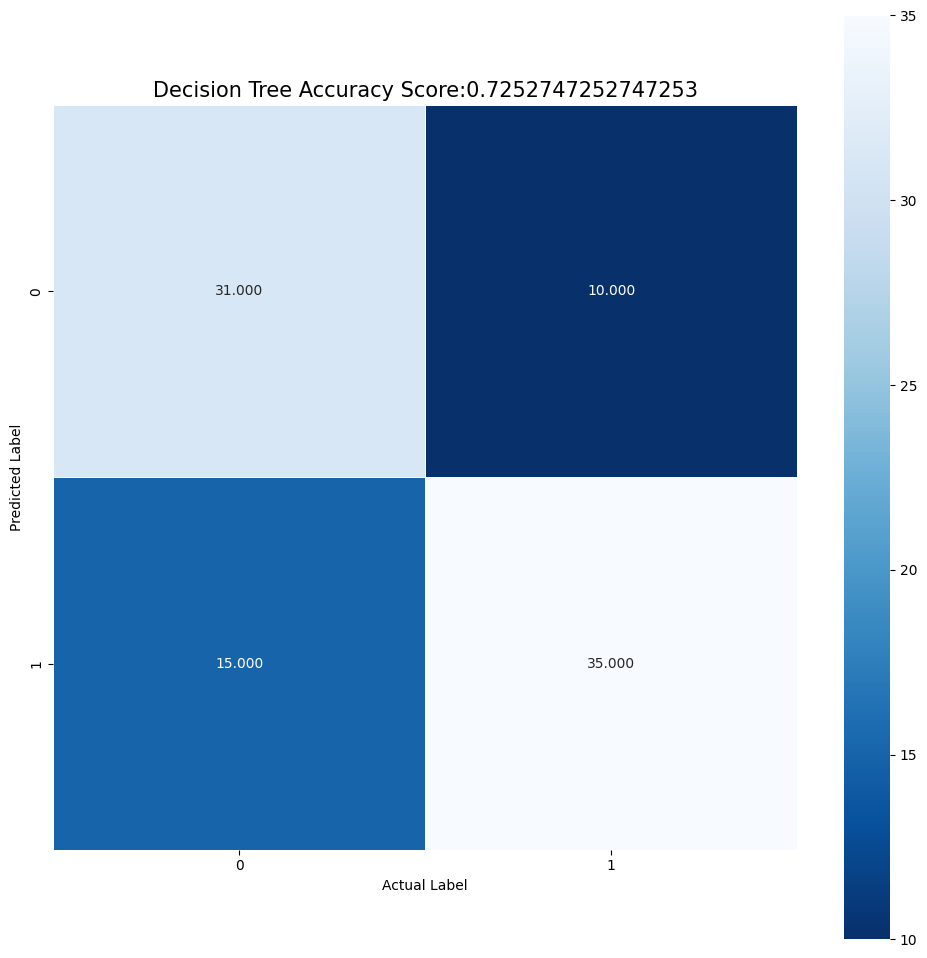

In [17]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm,annot=True, fmt=".3f",linewidth=.5,square=True,cmap='Blues_r')
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
title ='Decision Tree Accuracy Score:{0}'.format(tree_score)
plt.title(title,size=15)

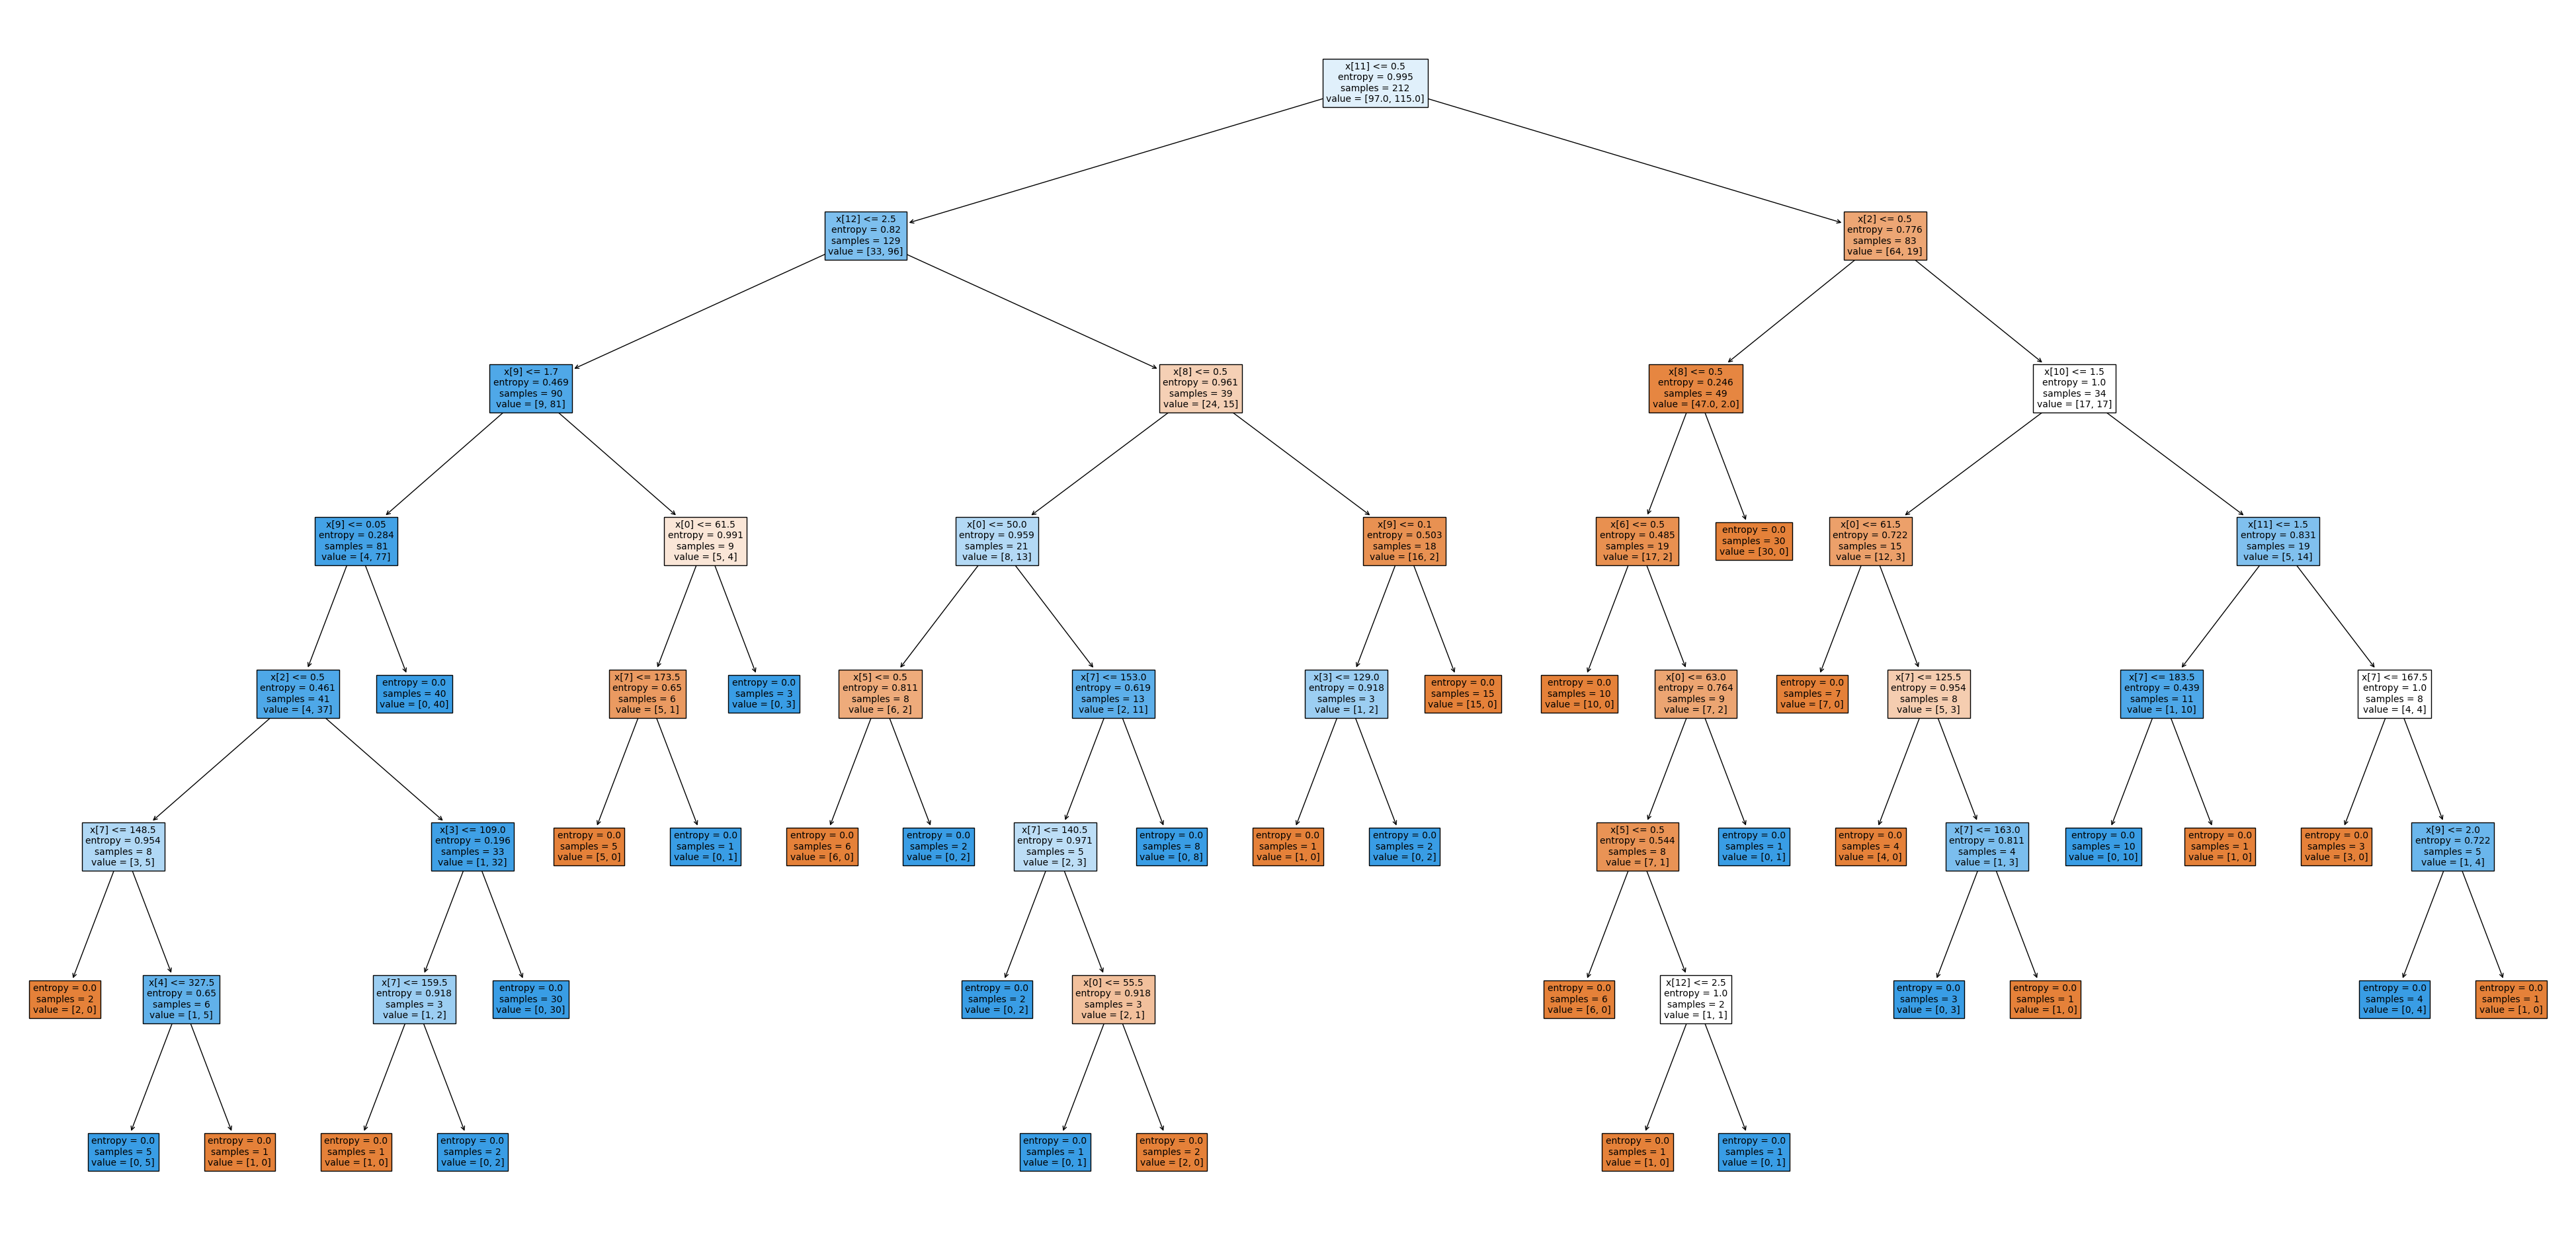

In [18]:
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf,filled=True,fontsize=10)
plt.savefig('decision_tree',dpi=100)
plt.show()

In [24]:
#câu 8
clf = tree.DecisionTreeClassifier(criterion="gini",random_state=0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [25]:
tree_pred = clf.predict(x_test)
tree_score = metrics.accuracy_score(y_test,tree_pred)
print("Accruracy:",tree_score)
print("Report:",metrics.classification_report(y_test,tree_pred))

Accruracy: 0.7252747252747253
Report:               precision    recall  f1-score   support

           0       0.67      0.76      0.71        41
           1       0.78      0.70      0.74        50

    accuracy                           0.73        91
   macro avg       0.73      0.73      0.72        91
weighted avg       0.73      0.73      0.73        91



In [26]:
tree_cm = metrics.confusion_matrix(y_test,tree_pred)

Text(0.5, 1.0, 'Decision Tree Accuracy Score:0.7252747252747253')

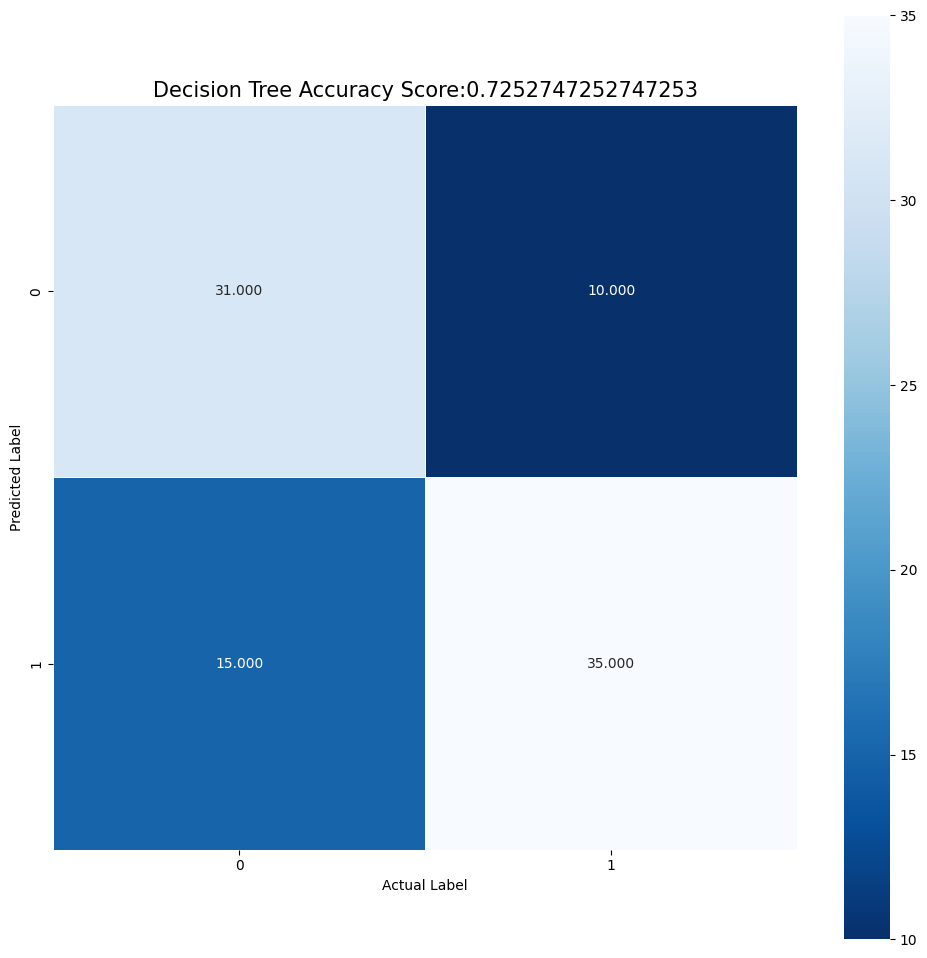

In [22]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm,annot=True, fmt=".3f",linewidth=.5,square=True,cmap='Blues_r')
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
title ='Decision Tree Accuracy Score:{0}'.format(tree_score)
plt.title(title,size=15)

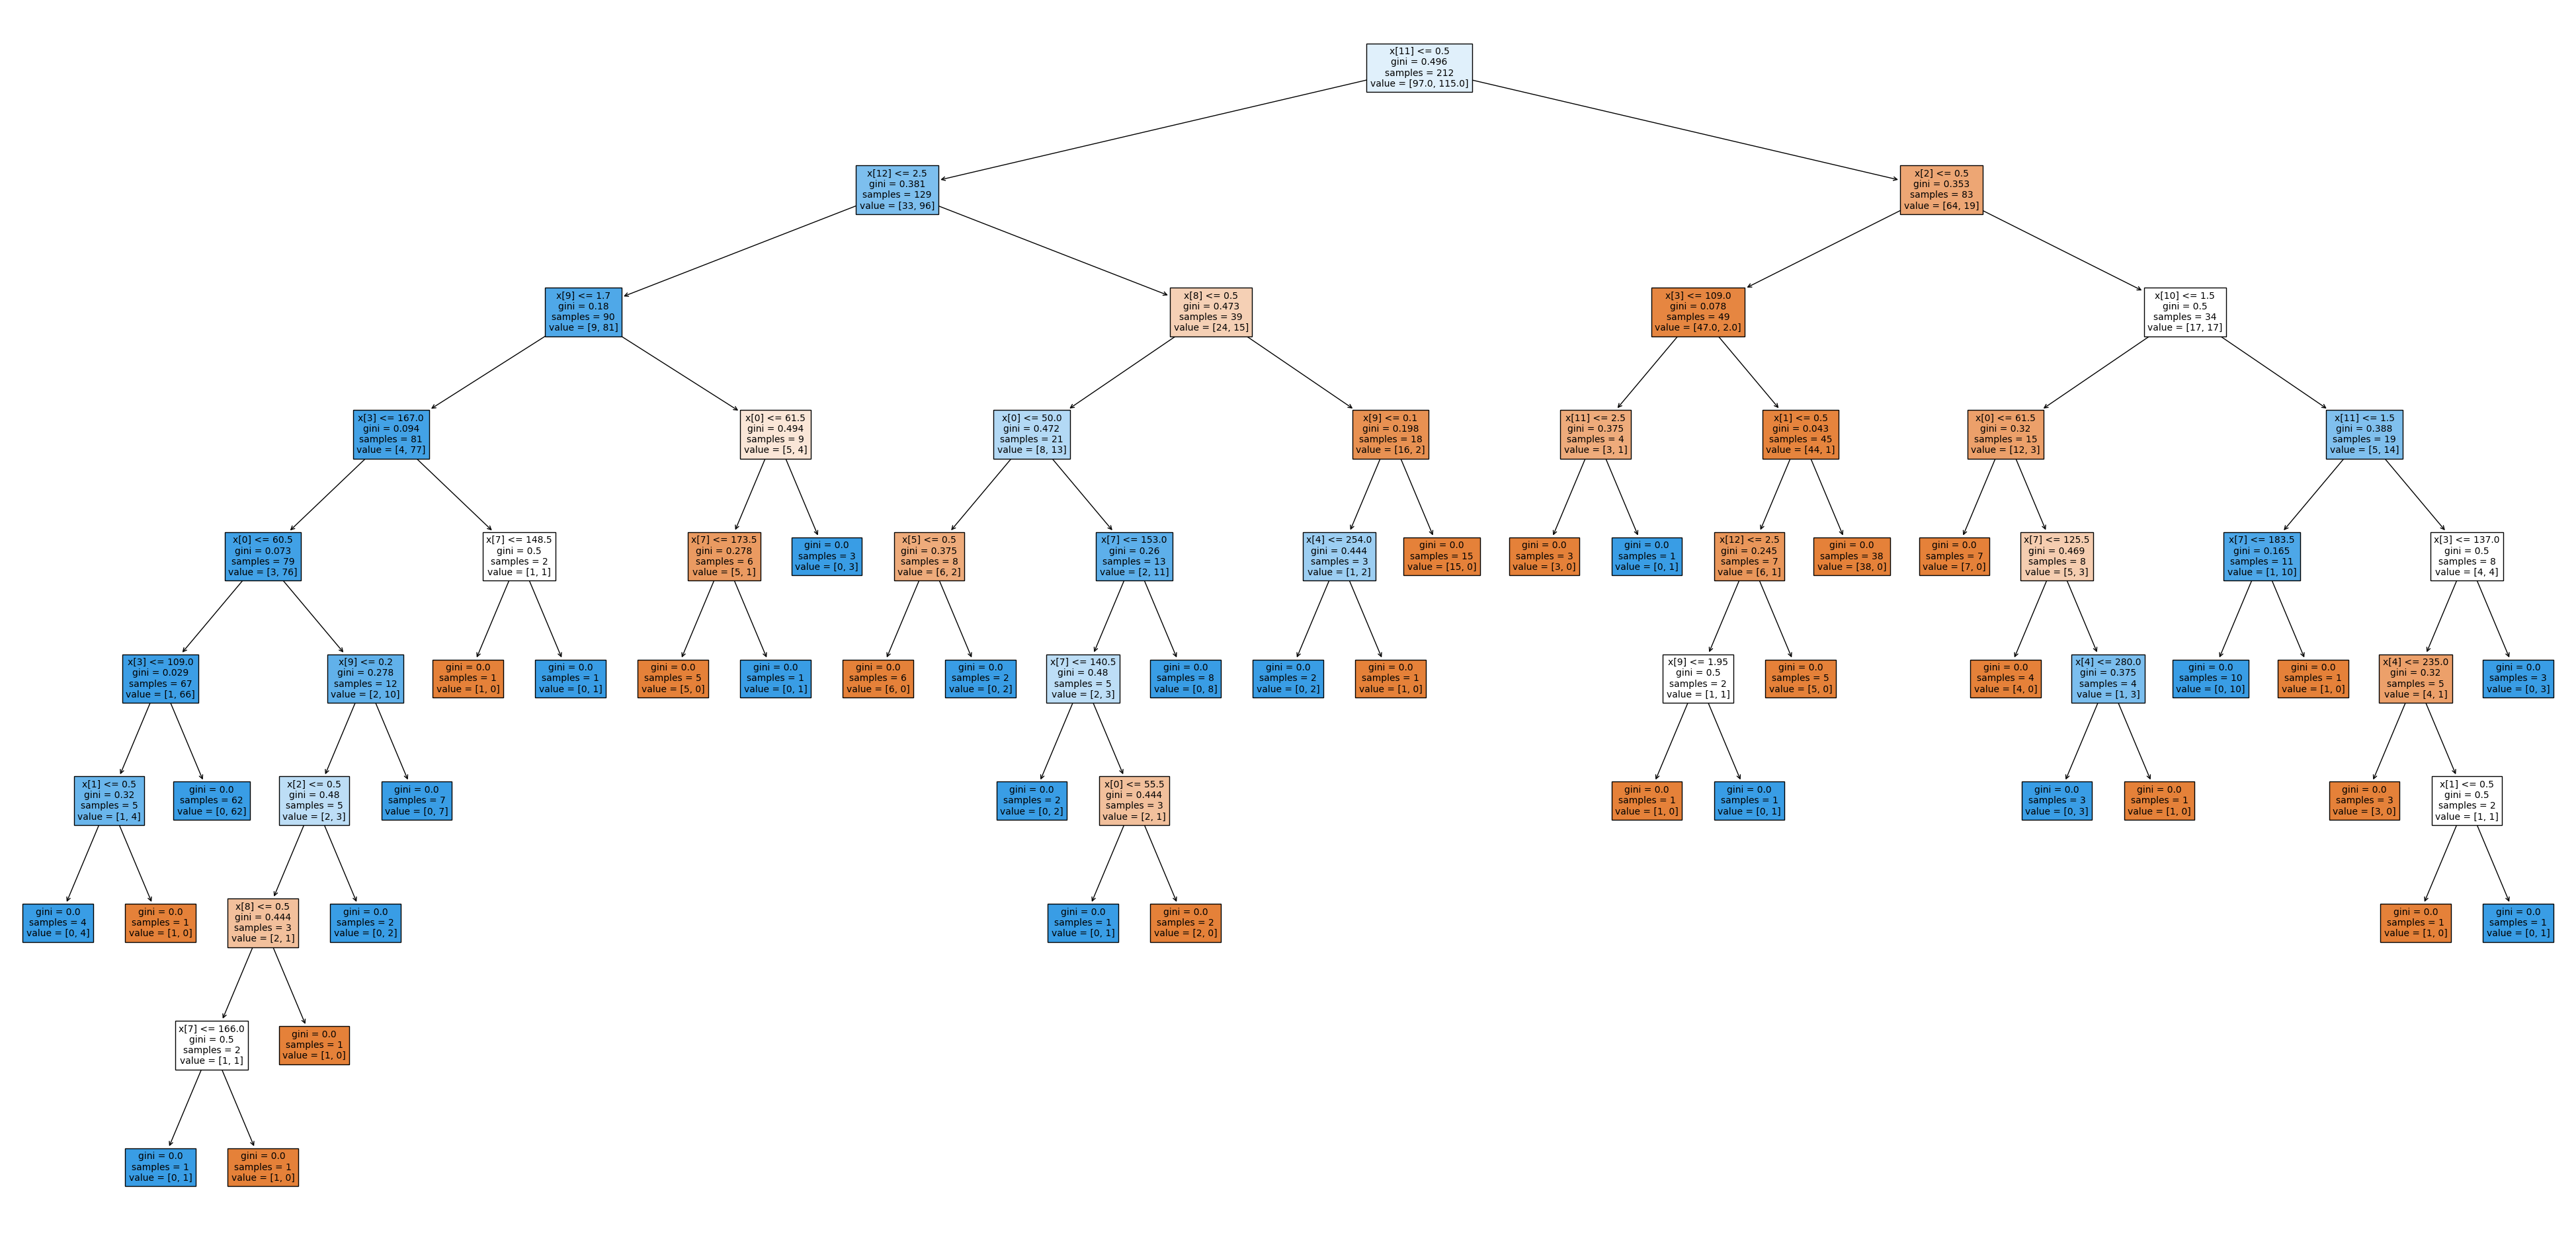

In [27]:
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf,filled=True,fontsize=10)
plt.savefig('decision_tree',dpi=100)
plt.show()

In [28]:
#câu 9
gnb = GaussianNB()
bayes_pred = gnb.fit(x_train, y_train).predict(x_test)

In [29]:
bayes_score = metrics.accuracy_score(y_test, bayes_pred)
print("Accuracy: ",bayes_score)
print("Report: ", metrics.classification_report(y_test, bayes_pred))

Accuracy:  0.8351648351648352
Report:                precision    recall  f1-score   support

           0       0.78      0.88      0.83        41
           1       0.89      0.80      0.84        50

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91



Text(0.5, 1.0, 'Native Bayes Accuracy Score: 0.8351648351648352')

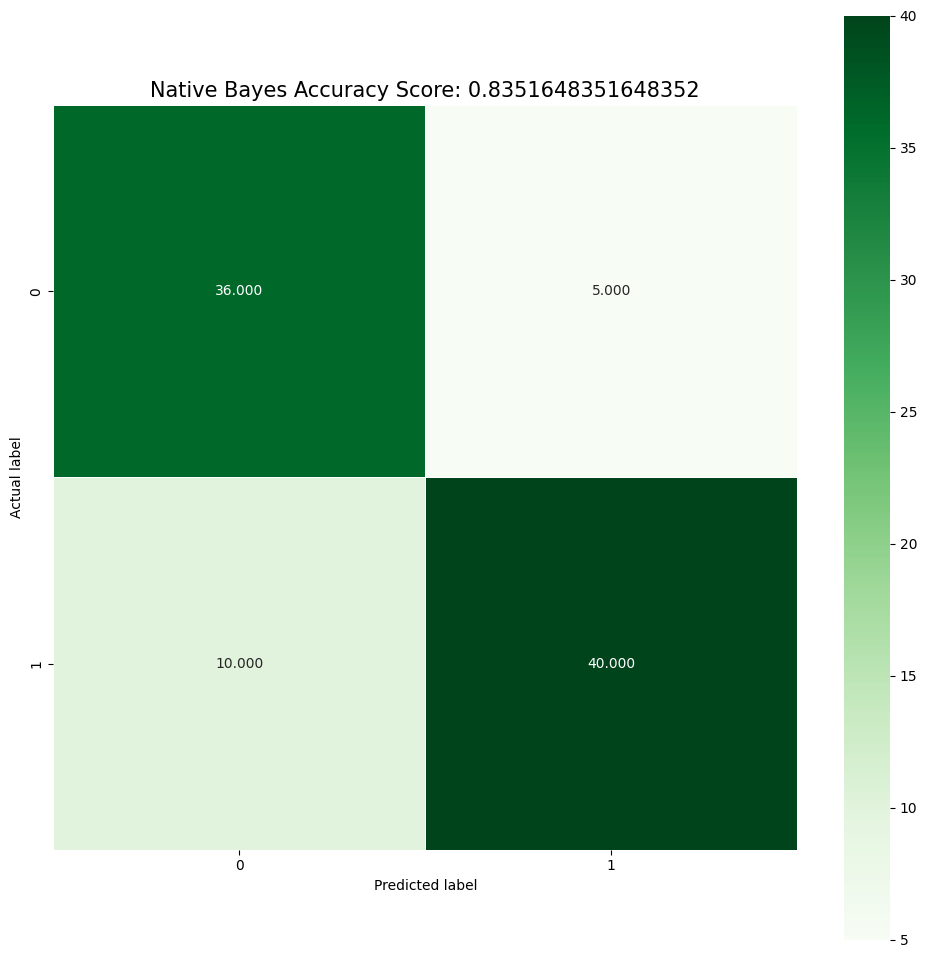

In [30]:
bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)
plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm,annot=True, fmt=".3f",linewidth=.5,square=True,cmap='Greens')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Native Bayes Accuracy Score: {0}'.format(bayes_score)
plt.title(title, size=15)

In [ ]:
#Câu 10: So sánh kết quả các mô hình
# Độ chính xác của các thuật toán
# Thuật toán cây ID3: 72.53%
# Thuật toán CART: 72.53%
# Thuật toán cây Naive Bayes: 83.52%
# => thuật toán Naive Bayes cho độ chính xác tốt nhất